In [1]:
import keras
import numpy as np
from keras import Input
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Model
from keras import applications
from keras import backend as k
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

2024-06-21 05:25:42.346681: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 05:25:42.346749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 05:25:42.347776: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 05:25:42.356255: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **Loading the Training and Testing Data and Defining the Basic Parameters**
* We are resizing the input image to 256 * 256

In [2]:
import os
import shutil

def filter_jpg_files(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    
    for root, _, files in os.walk(src_dir):
        for file in files:
            if file.lower().endswith('.jpg'):
                src_file_path = os.path.join(root, file)
                dest_file_path = os.path.join(dest_dir, os.path.relpath(src_file_path, src_dir))
                dest_file_dir = os.path.dirname(dest_file_path)
                if not os.path.exists(dest_file_dir):
                    os.makedirs(dest_file_dir)
                shutil.copy2(src_file_path, dest_file_path)

# Paths to your original and filtered datasets
train_src_dir = '/workspace/Usrf/day6/data/Skin_Data/Train'
test_src_dir = '/workspace/Usrf/day6/data/Skin_Data/Test'
train_dest_dir = '/workspace/Usrf/day6/data/Skin_Data/Filtered_Train'
test_dest_dir = '/workspace/Usrf/day6/data/Skin_Data/Filtered_Test'

filter_jpg_files(train_src_dir, train_dest_dir)
filter_jpg_files(test_src_dir, test_dest_dir)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the paths for filtered training and test data
train_data_path = '/workspace/Usrf/day6/data/Skin_Data/Filtered_Train'
test_data_path = '/workspace/Usrf/day6/data/Skin_Data/Filtered_Test'

# Read the training data and set the batch size
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(256, 256),
        batch_size=8,
        class_mode='binary',
        shuffle=True)  # It is usually a good idea to shuffle the training data

# Read the test data and set the batch size
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary',
        shuffle=False)  # No need to shuffle test data

Found 84 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [4]:
img, label = test_generator.next()
img[0].shape

(256, 256, 3)

In [5]:
model=Sequential()
model.add(Input(shape=(256,256,3)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

2024-06-21 05:25:45.104639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1926] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17947 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 3g.20gb, pci bus id: 0000:b7:00.0, compute capability: 8.0


In [6]:
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      verbose=1)

Epoch 1/30


2024-06-21 05:25:46.229104: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:467] Loaded cuDNN version 90100
2024-06-21 05:25:46.639241: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f70488458e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-21 05:25:46.639296: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB MIG 3g.20gb, Compute Capability 8.0
2024-06-21 05:25:46.645941: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718947546.765970   76072 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 [==============================] - 3s 73ms/step - loss: 11.7864 - accuracy: 0.5119
Epoch 2/30
10/10 [==============================] - 0s 35ms/step - loss: 0.7110 - accuracy: 0.5119
Epoch 3/30
10/10 [==============================] - 0s 16ms/step - loss: 0.5446 - accuracy: 0.7381
Epoch 4/30
10/10 [==============================] - 0s 14ms/step - loss: 0.4470 - accuracy: 0.7738
Epoch 5/30
10/10 [==============================] - 0s 17ms/step - loss: 0.2865 - accuracy: 0.9286
Epoch 6/30
10/10 [==============================] - 0s 14ms/step - loss: 0.3404 - accuracy: 0.8929
Epoch 7/30
10/10 [==============================] - 0s 15ms/step - loss: 0.3063 - accuracy: 0.9286
Epoch 8/30
10/10 [==============================] - 0s 23ms/step - loss: 0.1881 - accuracy: 0.9167
Epoch 9/30
10/10 [==============================] - 0s 16ms/step - loss: 0.1706 - accuracy: 0.9643
Epoch 10/30
10/10 [==============================] - 0s 19ms/step - loss: 0.1484 - accuracy: 0.9286
Epoch 11/30
10/10 [

In [7]:
model.save("skin_cancer_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


/tmp/ipykernel_74891/461992945.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


204/204 [==============================] - 1s 2ms/step
No of errors = 48/204


In [9]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

76.47058823529412

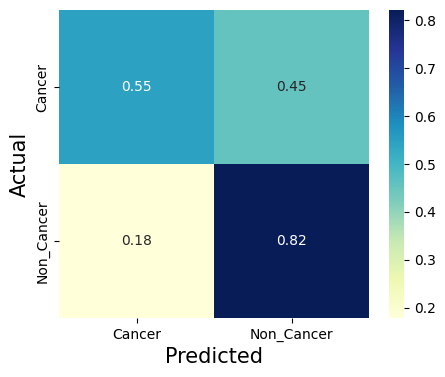

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

# **Exploring Keras Applications for Transfer Learning**

## **VGG16**

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= (256, 256, 3)) # Include_top = False means excluding the model fully connected layers
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

# **Adding top layers according to number of classes in our data**

In [12]:
flatten_layer = layers.GlobalAveragePooling2D()
dense_layer_1 = layers.Dense(63, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    dense_layer_1,
    dense_layer_2,
    flatten_layer,
    prediction_layer
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 dense_2 (Dense)             (None, 8, 8, 63)          32319     
                                                                 
 dense_3 (Dense)             (None, 8, 8, 32)          2048      
                                                                 
 global_average_pooling2d (  (None, 32)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 14749121 (56.26 MB)
Trainable params: 34433 (134.50 KB)
Non-trainable params: 14714688 (56.13 MB)
________

# **Training**

In [13]:
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      verbose=1)

Epoch 1/30
10/10 [==============================] - 5s 192ms/step - loss: 0.7128 - acc: 0.5238
Epoch 2/30
10/10 [==============================] - 1s 64ms/step - loss: 0.6994 - acc: 0.5000
Epoch 3/30
10/10 [==============================] - 0s 18ms/step - loss: 0.6624 - acc: 0.6667
Epoch 4/30
10/10 [==============================] - 0s 19ms/step - loss: 0.6557 - acc: 0.5952
Epoch 5/30
10/10 [==============================] - 0s 17ms/step - loss: 0.6320 - acc: 0.6667
Epoch 6/30
10/10 [==============================] - 0s 18ms/step - loss: 0.6141 - acc: 0.7381
Epoch 7/30
10/10 [==============================] - 0s 23ms/step - loss: 0.5912 - acc: 0.7262
Epoch 8/30
10/10 [==============================] - 0s 18ms/step - loss: 0.5776 - acc: 0.7143
Epoch 9/30
10/10 [==============================] - 0s 17ms/step - loss: 0.5708 - acc: 0.7024
Epoch 10/30
10/10 [==============================] - 0s 18ms/step - loss: 0.5435 - acc: 0.7976
Epoch 11/30
10/10 [==============================] - 0s 24

# **Saving the model**

In [14]:
model.save("VGG16_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Loading the model**

In [15]:
model = models.load_model('VGG16_plant_deseas.h5')
print("Model is loaded")

Model is loaded


# **Saving the Weights**

In [16]:
model.save_weights('cnn_classification.h5')

# **Loading the weights**

In [17]:
model.load_weights('cnn_classification.h5')

# **Performance measure**

In [18]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


/tmp/ipykernel_74891/461992945.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


204/204 [==============================] - 2s 5ms/step
No of errors = 55/204


In [19]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

73.0392156862745

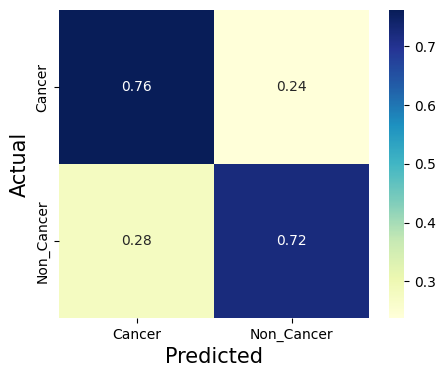

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

              precision    recall  f1-score   support

      Cancer       0.42      0.76      0.54        42
  Non_Cancer       0.92      0.72      0.81       162

    accuracy                           0.73       204
   macro avg       0.67      0.74      0.67       204
weighted avg       0.82      0.73      0.75       204

